In [1]:
import os 

# Set the working directory to the root of the project
# os.chdir(r'C:\Users\jespe\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam') # Desktop
os.chdir(r"C:\Users\Jesper\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam") # Laptop
print("Current working directory:", os.getcwd()) 

Current working directory: C:\Users\Jesper\Documents\GitHub Local\MPCAS\MVE441_StatLearning\Exam


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate

# Question 1

In [3]:
# import data
dataset = pd.read_csv('data\data_dropna.txt', sep='\t')
# remove the first column (index, not class)
dataset = dataset.iloc[:, 1:]
dataset.head()

,class,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 991,feature 992,feature 993,feature 994,feature 995,feature 996,feature 997,feature 998,feature 999,feature 1000
0,2,-1.986901,-0.099954,0.974906,0.588525,-0.468599,-1.741473,1.122659,-0.498773,0.821948,...,0.175280,1.733996,0.504883,0.030797,-1.067338,-0.407298,0.470651,1.710230,1.549639,3.009124
1,1,-1.961148,-2.066390,1.157878,2.638431,0.380795,-1.135741,1.407938,0.641110,-0.257362,...,1.388097,0.940432,-3.248729,-1.056628,0.526422,-0.141712,-0.243878,2.261639,-0.178581,0.717398
2,3,-0.288366,1.755972,-1.144203,0.321466,1.399391,0.854409,-1.334523,-0.673844,-0.706075,...,-1.339229,-0.997101,-0.565771,2.662074,-0.520536,0.371094,-0.182359,-2.124540,-0.127067,-0.273763
3,3,2.504740,0.144209,2.255337,0.306778,1.239686,-0.452261,0.057692,1.508914,0.124645,...,1.096542,-0.198090,-0.855567,-0.923564,-0.994823,-1.253920,0.359540,-0.418368,0.423453,1.433150
4,3,1.043688,-1.259556,-0.883828,-0.602256,1.060515,0.693789,-0.338924,-1.363808,-1.105754,...,-1.537380,-0.122267,-0.471979,1.273902,-0.247562,0.620541,1.300284,-2.170962,0.975459,-0.175873


Divide data into training and testing

In [4]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

num_classes = len(np.unique(y))
print("Number of classes:", num_classes)
num_samples = len(y)
print("Number of samples:", num_samples)
num_features = X.shape[1]
print("Number of features:", num_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

Number of classes: 4
Number of samples: 2019
Number of features: 1000


In [5]:
feature_means = np.mean(X_train, axis=0)
feature_stds = np.std(X_train, axis=0)

print(f"min mean: [{np.min(feature_means)}], max mean: [{np.max(feature_means)}]")
print(f"min std: [{np.min(feature_stds)}], max std: [{np.max(feature_stds)}]")

min mean: [-0.24759869279864985], max mean: [0.2697955077256321]
min std: [1.0469221555236774], max std: [1.2064701767716297]


**Note**: No need for standard scaling

Create function for visualization

In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def transform_to_visualize(X, method='t-SNE'):
    if method == 't-SNE':
        tsne = TSNE(n_components=2, random_state=1234)
        X_transformed = tsne.fit_transform(X)
    elif method == 'PCA':
        pca = PCA(n_components=2, random_state=1234)
        X_transformed = pca.fit_transform(X)
    else:
        raise ValueError(f"Unknown method: {method}")
    return X_transformed

def visualize(X, y, colors_classes, method='t-SNE'):
    X_transformed = transform_to_visualize(X, method)
    
    plt.figure(figsize=(6, 6))
    plt.title(f'{method} visualization of the dataset', fontsize=12)
    sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=y, palette=colors_classes)
    plt.xlabel(f'{method} component 1')
    plt.ylabel(f'{method} component 2')
    plt.show()

def visualize_classes(X, y, colors_classes):
    X_tsne = transform_to_visualize(X, 't-SNE')
    X_PCA = transform_to_visualize(X, 'PCA')

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.title('t-SNE visualization of the training set', fontsize=12)
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette=colors_classes)
    plt.xlabel('t-SNE component 1')
    plt.ylabel('t-SNE component 2')

    plt.subplot(1, 2, 2)
    plt.title('PCA visualization of the train set', fontsize=12)
    sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], hue=y, palette=colors_classes)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.show()

## 1a)

For now, let us ignore the missing values. That is, drop the observations that contain any missing values.

Train multiple classifiers (at least 6, of varying degrees of complexity) on multiple training-test splits of the data. Compare classification performance.

Pay particular attention to the following;

- balance between classes
- classification accuracy, specificity and sensitivity overall and the class level.

Be careful about using the full data set for any training/validation steps. For example, exploration and dimension reduction, if you choose to pursue this approach, should be done of the training data only.  
Make sure to discuss:
- Overall performance and how you assess this
- Are all or only some classes well separated
- Class imbalance, modeling assumptions, training metrics
- The full training pipeline you set up and motivate all your choices

Visualize class separation on training data

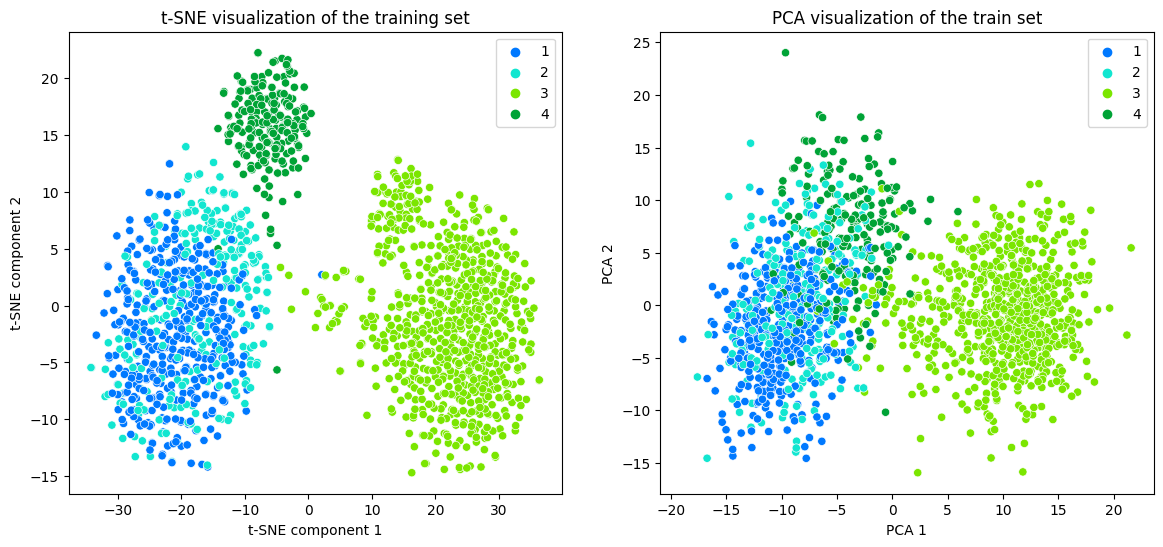

In [7]:
colors_classes = ["#0079FF", "#12E6D0", "#7BE600", "#00A336"]
visualize_classes(X_train, y_train, colors_classes)

**Note**: Classes 3 and 4 show good separation, while 1 and 2 are not well-separated  
**Expectations**:  
- Simple models will perform poorly, especially on classes 1 and 2

### Implement classification

In [8]:
# import classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Linear Discriminant Analysis
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes
# from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.svm import SVC  # Support Vector Machine

# import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Construct functions for model evaluation

In [9]:
def get_accuracy(y_pred, y_test):
    return accuracy_score(y_test, y_pred)

def get_class_level_accuracy(y_pred, y_test):
    class_accuracy = []
    # option 1
    for i in range(num_classes):
        accurate_predictions = np.sum((y_test == i+1) & (y_pred == i+1)) 
        total_predictions = np.sum(y_pred == i+1)
        
        class_accuracy.append(accurate_predictions/total_predictions)
        
    # option 2
    # for i in range(num_classes):
    #     accurate_positives = np.sum((y_test == i+1) & (y_pred == i+1)) 
    #     total_positives = np.sum(y_test == i+1)
        
    #     accuracy_classes.append(accurate_positives/total_positives)
    
    return class_accuracy

def get_precision_recall(y_pred, y_test, average_setting):
    precision = precision_score(y_test, y_pred, average=average_setting)
    recall = recall_score(y_test, y_pred, average=average_setting)

    return precision, recall

def cv_optimize_RF(n_estimators_list, X_train, y_train, scoring=['f1_macro'], k=10, visualize_cv=False): # currently only for f1_score

    cv_score = []
    for n_estimators in n_estimators_list:
        rf = RandomForestClassifier(n_estimators=n_estimators, random_state=1234)
        cv_scores = cross_validate(rf, X_train, y_train, cv=k, scoring=scoring, n_jobs=-1)
        cv_score.append(cv_scores['test_f1_macro'])
        
    cv_score_mean = np.mean(cv_score, axis=1)
    cv_score_std = np.std(cv_score, axis=1)

    if visualize_cv:
        plt.figure(figsize=(8, 6)) 
        plt.title('Cross-validation of Random Forest Classifier', fontsize=12)
        plt.plot(n_estimators_list, cv_score_mean, marker='o', label='F1 macro')
        plt.fill_between(n_estimators_list, cv_score_mean - cv_score_std, cv_score_mean + cv_score_std, alpha=0.2)

        plt.xlabel('Number of estimators')
        plt.ylabel('F1 macro score')
        plt.legend()
        plt.show()
    
    best_n_estimators = n_estimators_list[np.argmax(cv_score_mean)]
    
    return best_n_estimators
    
def cv_optimize_KNN(n_neighbors_list, X_train, y_train, scoring=['f1_macro'], k=10, visualize_cv=False): # currently only for f1_score
    
    cv_score = []
    for n_neighbors in n_neighbors_list:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)
        cv_scores = cross_validate(knn, X_train, y_train, cv=k, scoring=scoring, n_jobs=-1)
        cv_score.append(cv_scores['test_f1_macro'])
        
    cv_score_mean = np.mean(cv_score, axis=1)
    cv_score_std = np.std(cv_score, axis=1)

    if visualize_cv:
        plt.figure(figsize=(8, 6)) 
        plt.title('Cross-validation of Random Forest Classifier', fontsize=12)
        plt.plot(n_neighbors_list, cv_score_mean, marker='o', label='F1 macro')
        plt.fill_between(n_neighbors_list, cv_score_mean - cv_score_std, cv_score_mean + cv_score_std, alpha=0.2)

        plt.xlabel('Number of estimators')
        plt.ylabel('F1 macro score')
        plt.legend()
        plt.show()
    
    best_n_neighbors = n_neighbors_list[np.argmax(cv_score_mean)]
    
    return best_n_neighbors    

def evaluate_classifier(classifier, X_train, y_train, X_test, y_test, average_setting):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = get_accuracy(y_pred, y_test)
    accuracy_classes = get_class_level_accuracy(y_pred, y_test)
    
    # get the f1 score, both class-wise and average
    f1_score_avg = f1_score(y_test, y_pred, average=average_setting)
    f1_score_classes = f1_score(y_test, y_pred, average=None)
    
    return y_pred, accuracy, accuracy_classes, f1_score_avg, f1_score_classes

def summarize_classifier_results(classifier_dict, results, return_df=False, visualize=False):
    
    accuracy_scores = results['accuracy_scores']
    accuracy_classes = results['accuracy_scores_classes']
    f1_scores = results['f1_scores']
    f1_scores_classes = results['f1_scores_classes']
    
    df_scores = pd.DataFrame({'Classifer': list(classifier_dict.keys()), 
                          'Accuracy': accuracy_scores, 
                          'Acc. C1': accuracy_classes[:, 0],
                          'Acc. C2': accuracy_classes[:, 1],
                          'Acc. C3': accuracy_classes[:, 2],
                          'Acc. C4': accuracy_classes[:, 3],
                          'F1 score': f1_scores,
                          'F1 C1': f1_scores_classes[:, 0],
                          'F1 C2': f1_scores_classes[:, 1],
                          'F1 C3': f1_scores_classes[:, 2],
                          'F1 C4': f1_scores_classes[:, 3]})

    value_vars_acc = ['Accuracy', 'Acc. C1', 'Acc. C2', 'Acc. C3', 'Acc. C4']
    df_scores_acc = pd.melt(df_scores, id_vars=['Classifer'], value_vars=value_vars_acc, var_name='Metric', value_name='Score')
    value_vars_f1 = ['F1 score', 'F1 C1', 'F1 C2', 'F1 C3', 'F1 C4']
    df_scores_f1 = pd.melt(df_scores, id_vars=['Classifer'], value_vars=value_vars_f1, 
                        var_name='Metric', value_name='Score')

    if visualize:
        plt.figure(figsize=(18, 8))

        plt.subplot(1, 2, 1)
        colors_metrics = ["#E69F00", "#D55E00"]
        palette_acc = sns.color_palette([colors_metrics[0]]+colors_classes)
        sns.barplot(x='Classifer', y='Score', hue='Metric', data=df_scores_acc, palette=palette_acc)
        plt.title('Accuracy scores')
        plt.legend(loc='center right')

        plt.subplot(1, 2, 2)
        palette_partial = sns.color_palette([colors_metrics[1]]+colors_classes)
        plt.title('F1 scores')
        sns.barplot(x='Classifer', y='Score', hue='Metric', data=df_scores_f1, palette=palette_partial)
        plt.legend(loc='center right')
        plt.show()
    
    if return_df:
        df_summary = pd.DataFrame({'Classifer': list(classifier_dict.keys()),
                                   'Accuracy': accuracy_scores,
                                   'Acc. C1': accuracy_classes[:, 0],
                                   'Acc. C2': accuracy_classes[:, 1],
                                   'F1 score': f1_scores,
                                   'F1 C1': f1_scores_classes[:, 0],
                                   'F1 C2': f1_scores_classes[:, 1]}, 
                                  columns=['Classifer', 'Accuracy', 'Acc. C1', 'Acc. C2',
                                           'F1 score', 'F1 C1', 'F1 C2'])
        
        
        return df_summary
    
def save_classifier_results_as_table(path_name, df_summary):
    df_summary.to_latex(path_name, index=False, bold_rows=True, float_format="%.3f", column_format='l|c|c|c|c|c|c')

#### Evaluate all classifiers at once

In [10]:
def generate_classifier_results(X_train, y_train, X_test, y_test, classifiers, average_setting='macro', 
                                visualize_cv=False, print_results=False):
    
    # cross-validation
    n_estimators_list = np.arange(300, 750, 50)
    best_n_estimators = cv_optimize_RF(n_estimators_list, X_train, y_train, visualize_cv=visualize_cv)
    print("Optimized number of estimators:", best_n_estimators, "\n")

    n_neighbors_list = np.arange(1, 51, 1)
    best_n_neighbors = cv_optimize_KNN(n_neighbors_list, X_train, y_train, visualize_cv=visualize_cv)
    print("Optimized number of neighbors:", best_n_neighbors, "\n")

    classifiers_dict = {
        'RF': RandomForestClassifier(n_estimators=best_n_estimators, random_state=1234, n_jobs=-1) if 'RF' in classifiers else None,
        'KNN': KNeighborsClassifier(n_neighbors=best_n_neighbors, n_jobs=-1) if 'KNN' in classifiers else None,
        'LDA': LinearDiscriminantAnalysis() if 'LDA' in classifiers else None,
        'LR': LogisticRegression(random_state=1234, max_iter=1000, n_jobs=-1) if 'LR' in classifiers else None,
        'NB': GaussianNB() if 'NB' in classifiers else None,
        'SVM': SVC(kernel='linear', random_state=1234) if 'SVM' in classifiers else None,
    }

    predictions = []
    accuracy_scores = []
    accuracy_scores_classes = []
    f1_scores = []
    f1_scores_classes = []

    for name, classifier in classifiers_dict.items():
        (y_pred, accuracy, accuracy_classes, 
        f1_score_avg, f1_score_classes) = evaluate_classifier(classifier, X_train, y_train,
                                                            X_test, y_test, average_setting)
        predictions.append(y_pred)
        accuracy_scores.append(accuracy)
        accuracy_scores_classes.append(accuracy_classes)
        f1_scores.append(f1_score_avg)
        f1_scores_classes.append(f1_score_classes)
        if print_results:
            print(f"Classifier: {name}")
            print(f"Accuracy: {accuracy:.3f}")
            print(f"Accuracy classes: {accuracy_classes}")
            print(f"F1 score average: {f1_score_avg:.3f}")
            print(f"F1 score classes: {f1_score_classes}")
            print()
        
    f1_scores_classes = np.array(f1_scores_classes)
    accuracy_scores_classes = np.array(accuracy_scores_classes)
    
    results = {"accuracy_scores": accuracy_scores, "accuracy_scores_classes": accuracy_scores_classes,
               "f1_scores": f1_scores, "f1_scores_classes": f1_scores_classes}
    
    return classifiers_dict, predictions, results


In [86]:
classifiers = ['RF', 'KNN', 'LDA', 'LR', 'NB', 'SVM']
(classifiers, predictions, results) = generate_classifier_results(X_train, y_train, X_test, y_test, classifiers,
                                                                  average_setting='macro', visualize_cv=False, print_results=True)

Optimized number of estimators: 500 

Optimized number of neighbors: 19 

Classifier: RF
Accuracy: 0.869
Accuracy classes: [0.7019867549668874, 0.92, 0.9659090909090909, 1.0]
F1 score average: 0.808
F1 score classes: [0.82490272 0.49462366 0.98265896 0.92857143]

Classifier: KNN
Accuracy: 0.886
Accuracy classes: [0.7238805970149254, 0.7804878048780488, 1.0, 1.0]
F1 score average: 0.847
F1 score classes: [0.80833333 0.58715596 1.         0.99159664]

Classifier: LDA
Accuracy: 0.899
Accuracy classes: [0.8383838383838383, 0.6891891891891891, 1.0, 0.9672131147540983]
F1 score average: 0.876
F1 score classes: [0.8097561  0.71830986 1.         0.97520661]

Classifier: LR
Accuracy: 0.933
Accuracy classes: [0.925531914893617, 0.7530864197530864, 1.0, 1.0]
F1 score average: 0.921
F1 score classes: [0.87       0.81879195 0.99705015 1.        ]

Classifier: NB
Accuracy: 0.894
Accuracy classes: [0.822429906542056, 0.6857142857142857, 1.0, 0.9666666666666667]
F1 score average: 0.870
F1 score classe

In [ ]:
df_scores = summarize_classifier_results(classifiers, results, return_df=True, visualize=True)
path_name = 'results/classifier_scores.tex'
save_classifier_results_as_table(path_name, df_scores)

#### Visualize misclassified samples

In [ ]:
X_tsne = transform_to_visualize(X_test, method='t-SNE')
colors_classes_miscl = colors_classes + ["#000000"]

plt.figure(figsize=(6, 6))
plt.title('t-SNE visualization of the test set, ground_truth', fontsize=12)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_test, palette=colors_classes)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

classifier_names = list(classifiers.keys())
plt.figure(figsize=(18, 12))
for i, y_pred in enumerate(predictions):
    y_pred[y_pred != y_test] = 50 # set misclassified to 50, ensures they are at the end of the legend
    num_missclassified = np.sum(y_pred != y_test)
    
    plt.subplot(2, 3, i+1)
    plt.title(f'Predictions, {classifier_names[i]}, {num_missclassified} misclassified', fontsize=12)
    ax = sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_pred, palette=colors_classes_miscl)
    plt.xlabel('t-SNE component 1')
    plt.ylabel('t-SNE component 2') if i == 0 or i == 3 else plt.ylabel('')

    handles, labels = ax.get_legend_handles_labels() 
    labels[-1] = 'Misclassified' # change last label to misclassified
    ax.legend(handles, labels)

#### Try with dimension reduction

In [ ]:
# Determine suitable number of components for PCA
# n_components = int(np.sqrt(num_features))
n_components = 100
pca_plot = PCA(n_components=n_components, random_state=1234)
pca_plot.fit(X_train)

explained_variance_num = 10
# plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.title('Explained variance ratio of PCA', fontsize=12)
plt.plot(np.arange(1, n_components + 1), pca_plot.explained_variance_ratio_, marker='o')
plt.vlines(explained_variance_num, 0, 1.05*pca_plot.explained_variance_ratio_.max(), colors='k', linestyles='dashed')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

print(f"Explained variance ratio of first {explained_variance_num} components: {pca_plot.explained_variance_ratio_[:explained_variance_num].sum():.3f}")

In [ ]:
n_components = 10
pca = PCA(n_components=n_components, random_state=1234)
X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

(classifiers, predictions, results) = generate_classifier_results(X_train_pca, y_train, X_test_pca, y_test, 
                                                             average_setting='macro', visualize_cv=False, print_results=False)

In [ ]:
df_scores_PCA = summarize_classifier_results(classifiers, results, return_df=True, visualize=True)
path_name = 'results/classifier_scores_PCA'+str(n_components)+'.tex'
save_classifier_results_as_table(path_name, df_scores_PCA)

#### Visualize misclassified samples for PCA

In [ ]:
X_tsne = transform_to_visualize(X_test_pca, method='t-SNE')
colors_classes_miscl = colors_classes + ["#000000"]

plt.figure(figsize=(6, 6))
plt.title('t-SNE visualization of the test set, ground_truth', fontsize=12)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_test, palette=colors_classes)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

classifier_names = list(classifiers.keys())
plt.figure(figsize=(18, 12))
for i, y_pred in enumerate(predictions):
    y_pred[y_pred != y_test] = 50 # set misclassified to 50, ensures they are at the end of the legend
    num_missclassified = np.sum(y_pred != y_test)
    
    plt.subplot(2, 3, i+1)
    plt.title(f'Predictions, {classifier_names[i]}, {num_missclassified} misclassified', fontsize=12)
    ax = sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_pred, palette=colors_classes_miscl)
    plt.xlabel('t-SNE component 1')
    plt.ylabel('t-SNE component 2') if i == 0 or i == 3 else plt.ylabel('')

    handles, labels = ax.get_legend_handles_labels() 
    labels[-1] = 'Misclassified' # change last label to misclassified
    ax.legend(handles, labels)

### Generate results for multiple data splits

In [ ]:
n_runs = 5

results_list = []
results_list_pca = []

for run in range(n_runs):
    print(f"Run {run+1}/{n_runs}")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=run)
    
    # Without PCA
    print("Generating results without PCA")
    (classifiers, predictions, 
     results) = generate_classifier_results(X_train, y_train, X_test, y_test, average_setting='macro', 
                                            visualize_cv=False, print_results=False)
    results_list.append(results)
    
    print("Generating results with PCA")
    n_components = 10
    pca = PCA(n_components=n_components, random_state=1234)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    (classifiers, predictions, 
     results_pca) = generate_classifier_results(X_train_pca, y_train, X_test_pca, y_test, average_setting='macro', 
                                            visualize_cv=False, print_results=False)
    results_list_pca.append(results_pca)

In [ ]:
def summarize_classifier_results_multiple_runs(classifier_dict, results_list, return_df=False, visualize=False):
    
    for i in range(len(results_list)):
        if i == 0:
            accuracy_scores = np.expand_dims(np.array(results_list[i]['accuracy_scores']), 0)
            accuracy_class_scores = np.expand_dims(np.array(results_list[i]['accuracy_scores_classes']), 0)
            f1_scores = np.expand_dims(np.array(results_list[i]['f1_scores']), 0)
            f1_class_scores = np.expand_dims(np.array(results_list[i]['f1_scores_classes']), 0)
        else:
            accuracy_scores = np.vstack((accuracy_scores, np.expand_dims(np.array(results_list[i]['accuracy_scores']), 0)))
            accuracy_class_scores = np.vstack((accuracy_class_scores, np.expand_dims(np.array(results_list[i]['accuracy_scores_classes']), 0)))
            f1_scores = np.vstack((f1_scores, np.expand_dims(np.array(results_list[i]['f1_scores']), 0)))
            f1_class_scores = np.vstack((f1_class_scores, np.expand_dims(np.array(results_list[i]['f1_scores_classes']), 0)))

    accuracy_scores_mean = np.mean(accuracy_scores, axis=0)
    accuracy_scores_std = np.std(accuracy_scores, axis=0)
    accuracy_class_scores_mean = np.mean(accuracy_class_scores, axis=0)
    accuracy_class_scores_std = np.std(accuracy_class_scores, axis=0)
    f1_scores_mean = np.mean(f1_scores, axis=0)
    f1_scores_std = np.std(f1_scores, axis=0)
    f1_class_scores_mean = np.mean(f1_class_scores, axis=0)
    f1_class_scores_std = np.std(f1_class_scores, axis=0)

    results_means = {'accuracy_scores': accuracy_scores_mean, 'accuracy_scores_classes': accuracy_class_scores_mean,
                    'f1_scores': f1_scores_mean, 'f1_scores_classes': f1_class_scores_mean}
    results_std_devs = {'accuracy_scores': accuracy_scores_std, 'accuracy_scores_classes': accuracy_class_scores_std,
                    'f1_scores': f1_scores_std, 'f1_scores_classes': f1_class_scores_std}	

    df_std_devs = pd.DataFrame({'Classifer': list(classifiers.keys()),
                                'Accuracy': results_std_devs['accuracy_scores'],
                                'Acc. C1': results_std_devs['accuracy_scores_classes'][:, 0],
                                'Acc. C2': results_std_devs['accuracy_scores_classes'][:, 1],
                                'Acc. C3': results_std_devs['accuracy_scores_classes'][:, 2],
                                'Acc. C4': results_std_devs['accuracy_scores_classes'][:, 3],
                                'F1 score': results_std_devs['f1_scores'],
                                'F1 C1': results_std_devs['f1_scores_classes'][:, 0],
                                'F1 C2': results_std_devs['f1_scores_classes'][:, 1],
                                'F1 C3': results_std_devs['f1_scores_classes'][:, 2],
                                'F1 C4': results_std_devs['f1_scores_classes'][:, 3]})
    
    accuracy_scores = results_means['accuracy_scores']
    accuracy_classes = results_means['accuracy_scores_classes']
    f1_scores = results_means['f1_scores']
    f1_scores_classes = results_means['f1_scores_classes']
    
    df_scores = pd.DataFrame({'Classifer': list(classifier_dict.keys()), 
                          'Accuracy': accuracy_scores, 
                          'Acc. C1': accuracy_classes[:,0],
                          'Acc. C2': accuracy_classes[:,1],
                          'Acc. C3': accuracy_classes[:,2],
                          'Acc. C4': accuracy_classes[:,3],
                          'F1 score': f1_scores,
                          'F1 C1': f1_scores_classes[:,0],
                          'F1 C2': f1_scores_classes[:,1],
                          'F1 C3': f1_scores_classes[:,2],
                          'F1 C4': f1_scores_classes[:,3]})

    value_vars_acc = ['Accuracy', 'Acc. C1', 'Acc. C2', 'Acc. C3', 'Acc. C4']
    df_scores_acc = pd.melt(df_scores, id_vars=['Classifer'], value_vars=value_vars_acc, var_name='Metric', value_name='Score')
    value_vars_f1 = ['F1 score', 'F1 C1', 'F1 C2', 'F1 C3', 'F1 C4']
    df_scores_f1 = pd.melt(df_scores, id_vars=['Classifer'], value_vars=value_vars_f1, var_name='Metric', value_name='Score')

    if visualize:
        plt.figure(figsize=(18, 8))

        plt.subplot(1, 2, 1)
        colors_metrics = ["#E69F00", "#D55E00"]
        palette_acc = sns.color_palette([colors_metrics[0]]+colors_classes)
        sns.barplot(x='Classifer', y='Score', hue='Metric', data=df_scores_acc,
                    palette=palette_acc)

        plt.title('Accuracy scores')
        plt.legend(loc='center right')

        plt.subplot(1, 2, 2)
        palette_partial = sns.color_palette([colors_metrics[1]]+colors_classes)
        plt.title('F1 scores')
        sns.barplot(x='Classifer', y='Score', hue='Metric', data=df_scores_f1, 
                    palette=palette_partial)
        plt.legend(loc='center right')
        plt.show()
    
    if return_df:
        df_summary = pd.DataFrame({'Classifer': list(classifier_dict.keys()),
                                   'Accuracy': accuracy_scores,
                                   'Acc. C1': accuracy_classes[:, 0],
                                   'Acc. C2': accuracy_classes[:, 1],
                                   'F1 score': f1_scores,
                                   'F1 C1': f1_scores_classes[:, 0],
                                   'F1 C2': f1_scores_classes[:, 1]}, 
                                  columns=['Classifer', 'Accuracy', 'Acc. C1', 'Acc. C2',
                                           'F1 score', 'F1 C1', 'F1 C2'])
        
        
        return df_summary, df_std_devs

In [ ]:
df_summary, df_std_devs = summarize_classifier_results_multiple_runs(classifiers, results_list, return_df=True, visualize=True)
path_name = 'results/classifier_scores_'+str(n_runs)+'runs.tex'
save_classifier_results_as_table(path_name, df_summary)
print("Standard deviations of the results")
print(df_std_devs)

In [ ]:
df_scores_pca, df_std_devs_pca = summarize_classifier_results_multiple_runs(classifiers, results_list_pca, return_df=True, visualize=True)
print("Standard deviations of the results with PCA")
print(df_std_devs_pca)

In [ ]:
path_name = 'results/classifier_scores_PCA'+str(n_components)+'_'+str(n_runs)+'runs.tex'
save_classifier_results_as_table(path_name, df_scores_PCA)

## 1b)

Let us turn our attention to feature selection. Again, we will ignore (drop) missing values for now.

Use at least 3 different techniques for selecting features for classification. (These should be truly different and not just the same wrapper applied to different classifiers. I.e., don't use variable importance on rf, logistic regression and knn for example, but explore other feature selection approaches.)

You can limit yourself to the most promising 3 classifiers from Question 1a for this task.

Pay particular attention to;
- selection stability
- how many features are selected with different methods/techniques/criteria  

Make sure to discuss:
- Method comparisons
- Are the same features predictive for all classes or can performance be improved if you can select different features for different classification tasks?
- Can you find an underlying reasons for why this particular task may be challenges (based on this data set, not in all generality)?
- Sources of, and approaches to improve, selection instability

In [11]:
# import feature selection methods
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

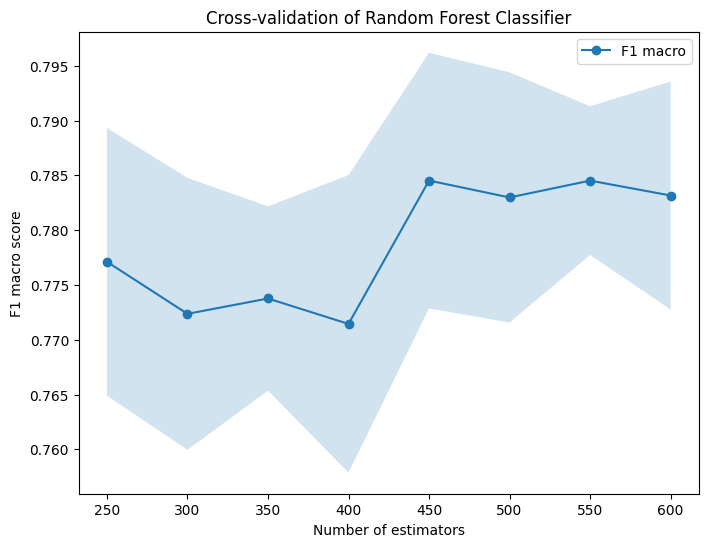

Optimal number of features (SVM, RFECV): 290


In [20]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# classifiers: RF, SVM, LR
classifiers = ['RF', 'SVM', 'LR']

# Recursive feature elimination with cross-validation
# SVM
min_features_to_select = 1
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
# clf = SVC(kernel="linear")
# clf = LogisticRegression(max_iter=1000, random_state=1234, n_jobs=-1)
best_n_estimators = cv_optimize_RF(np.arange(250, 650, 50), X_train, y_train, k=5, visualize_cv=True)
clf = RandomForestClassifier(n_estimators=best_n_estimators, random_state=1234, n_jobs=-1)

rfecv = RFECV(estimator=clf, step=1, cv=cv, scoring='f1_macro', min_features_to_select=min_features_to_select, n_jobs=-1)
rfecv.fit(X_train, y_train)

print("Optimal number of features (SVM, RFECV): %d" % rfecv.n_features_)

# generate results
# (classifiers, predictions, results_list) = generate_classifier_results(X_train, y_train, X_test, y_test, classifiers,                                                                  #    average_setting='macro', visualize_cv=True, print_results=True)

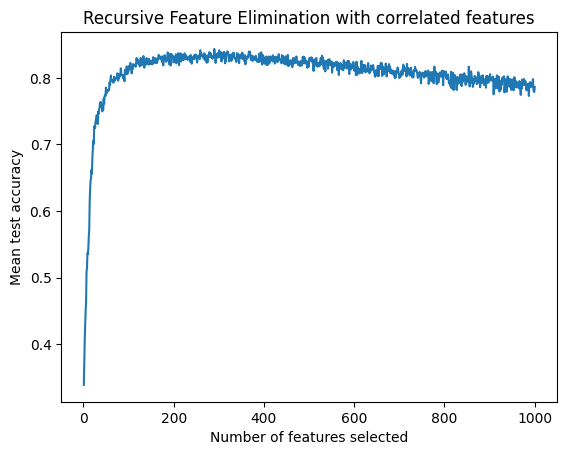

In [21]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.plot(range(min_features_to_select, n_scores + min_features_to_select), rfecv.cv_results_["mean_test_score"])
plt.title("Recursive Feature Elimination with correlated features")
plt.show()

In [19]:
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)
print(X_train_rfecv.shape)
print(X_test_rfecv.shape)

(1615, 690)
(404, 690)
